In [1]:
from collections import defaultdict
import json
import math

import gensim
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)

In [26]:
topics_path = '/Volumes/MARIA/output/translations/dante/topics'

lda_model = gensim.models.wrappers.LdaMallet.load(topics_path + '/50.cantos.gensim.model')
lda_dictionary = gensim.corpora.Dictionary.load(topics_path + '/50.cantos.gensim.dict')
training_data = json.load(open(topics_path + '/50.cantos.training_data.json', 'rb'))

In [27]:
topics = lda_model.print_topics(num_topics=-1, num_words=10)
topic_terms = []

for _topic in topics:
    _words = [t.split('*')[1].strip().strip('\"') for t in _topic[1].split('+')]
    topic_terms.append([w for w in _words if w != 'amp'])
    
for i, terms in enumerate(topic_terms):
    print(i, ' '.join(terms))

0 world ill years hundred gave true hard counsel deeds standard
1 flame mine living fire earth son rose left didst sound
2 day long felt shalt pass issue air ne sordello tree
3 circle round force race wherefore knowledge god life son words
4 ring man thought view spirit reach ning fail life lo
5 spake answer turn side mark call wave space ne cried
6 made honour great began sin green spirits lofty speech master
7 world blood seest war dead made passage lives wont brought
8 hand blood words speech stood bear foot death woe pain
9 back eye place pass bank advance found rock beheld proud
10 view mov mark ere words turn ken past saintly fix
11 round place wood leaves sand foot downward ground flames beheld
12 man air pass eyes hope woe spirits death pity enter
13 love hope good things voice soul silent earth spake grace
14 heart hast weeping father shalt eyes weep body earth soul
15 behold speak mayst dark race mind discourse soul blood alive
16 thought deep back body water reader truth fou

In [28]:
original_texts = training_data['original_texts']
training_documents = training_data['training_documents']
text_ids = training_data['text_ids']
times = training_data['times']
topic_assignments = training_data['topic_assignments']
topic_distributions = training_data['topic_distributions']

len(original_texts), len(training_documents), len(text_ids), len(times), len(topic_assignments), len(topic_distributions)

(204, 204, 204, 204, 204, 204)

# Plot topics over time

In [29]:
topic_times_dict = defaultdict(list)

for i, topics in enumerate(topic_assignments):
    if text_ids[i] == 0:
        _time = times[i]
    
        for topic in topics:
            topic_times_dict[topic].append(_time)

len(topic_times_dict)

22

Topic ID: 0


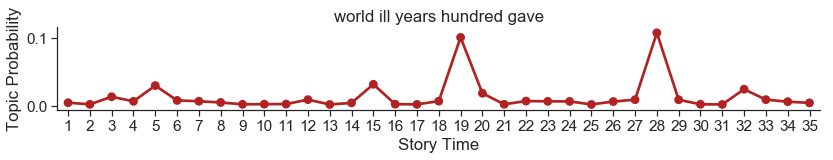

Topic ID: 1


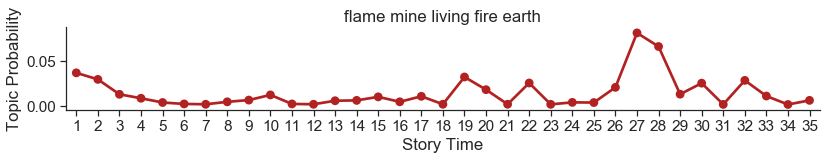

Topic ID: 2


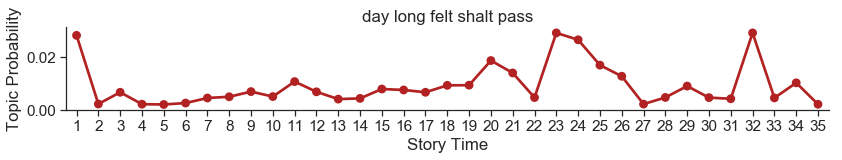

Topic ID: 3


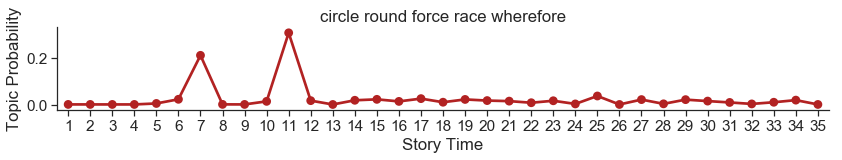

Topic ID: 4


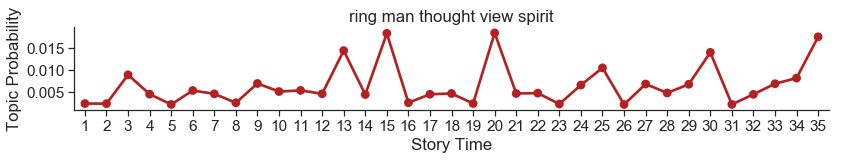

Topic ID: 5


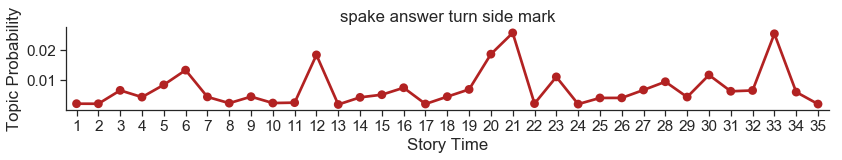

Topic ID: 6


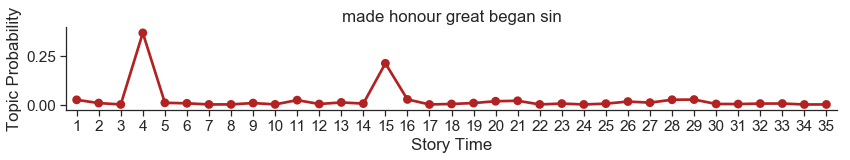

Topic ID: 7


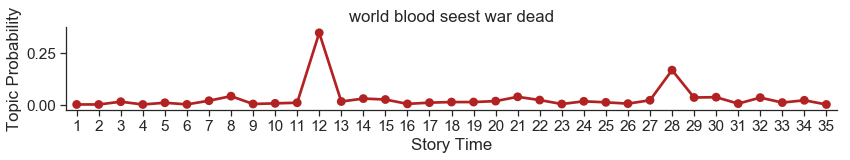

Topic ID: 8


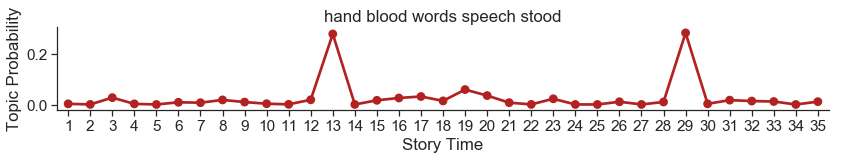

Topic ID: 9


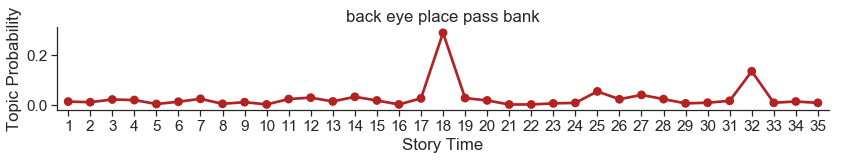

Topic ID: 10


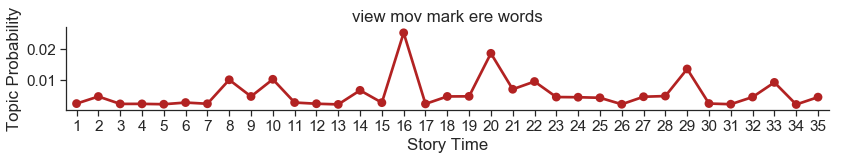

Topic ID: 11


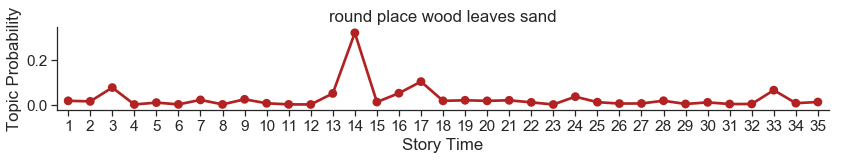

Topic ID: 12


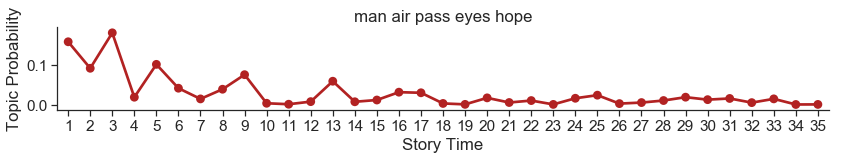

Topic ID: 13


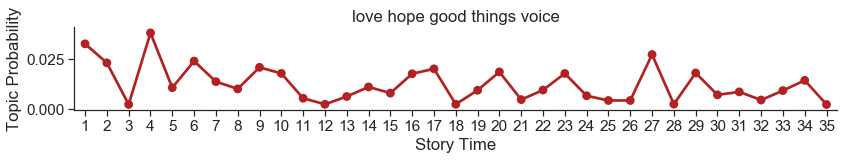

Topic ID: 14


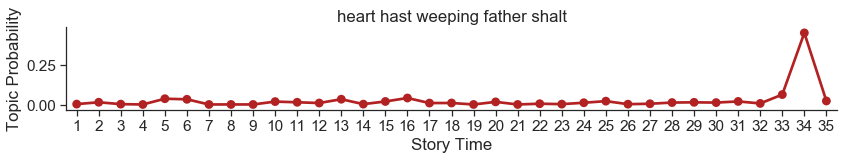

Topic ID: 15


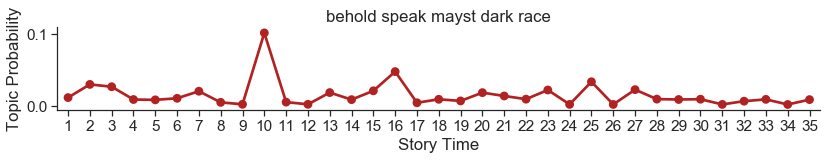

Topic ID: 16


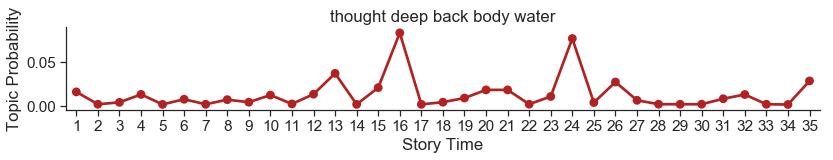

Topic ID: 17


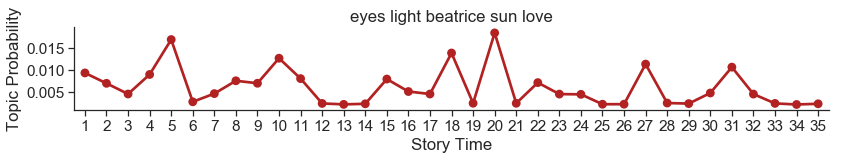

Topic ID: 18


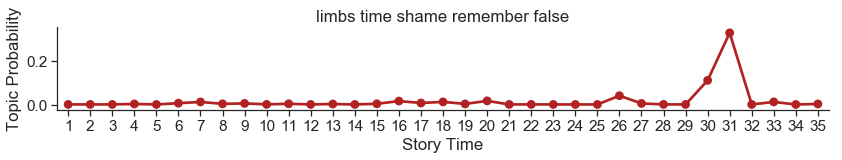

Topic ID: 19


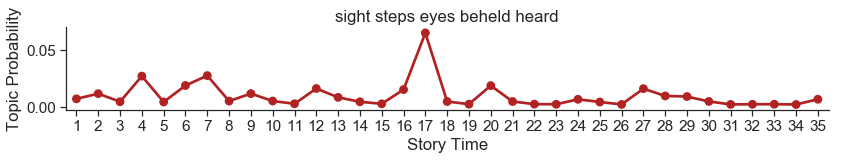

Topic ID: 20


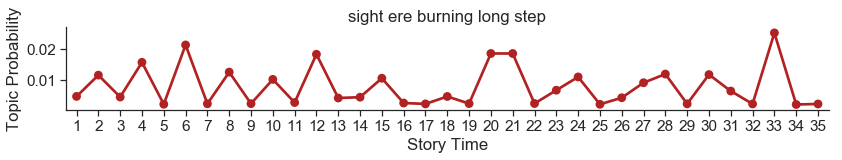

Topic ID: 21


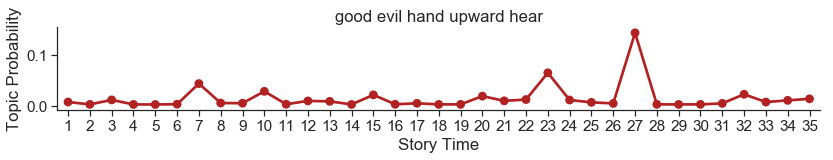

Topic ID: 22


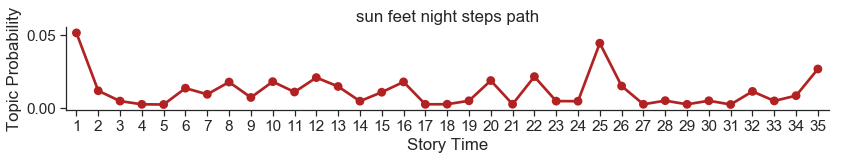

Topic ID: 23


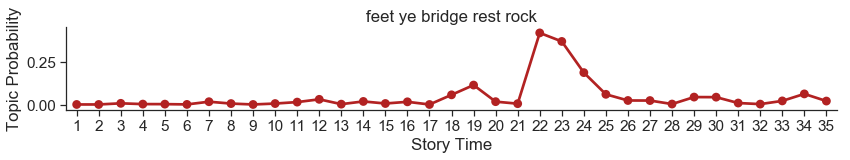

Topic ID: 24


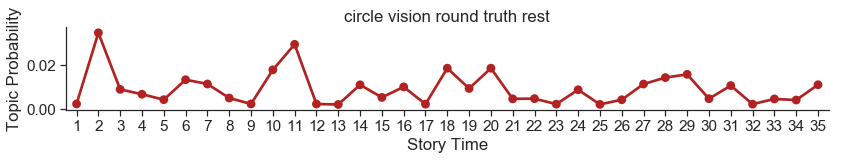

Topic ID: 25


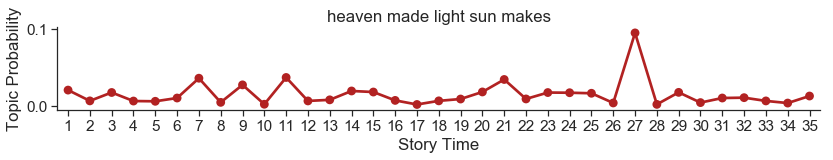

Topic ID: 26


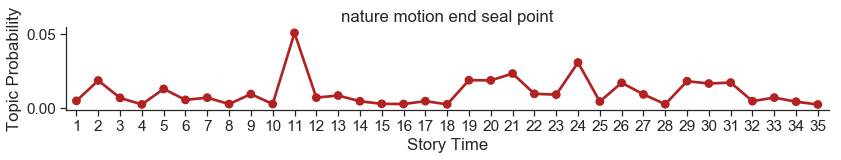

Topic ID: 27


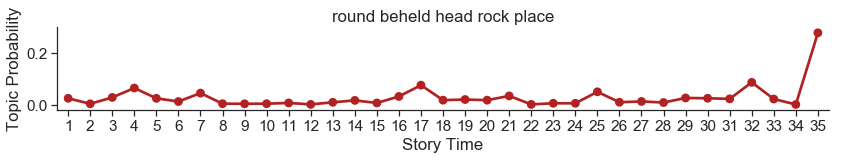

Topic ID: 28


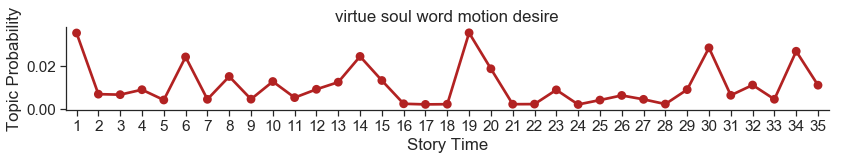

Topic ID: 29


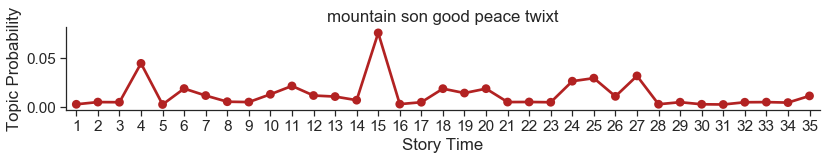

Topic ID: 30


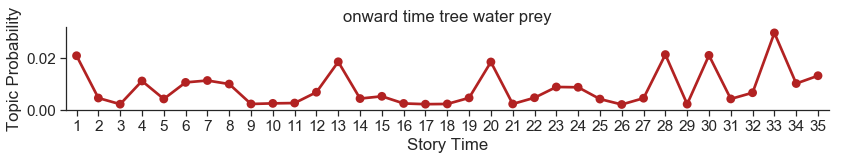

Topic ID: 31


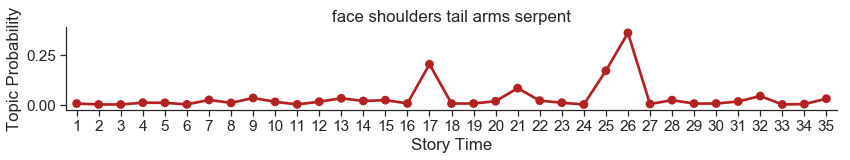

Topic ID: 32


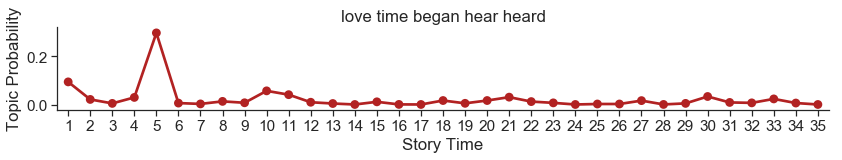

Topic ID: 33


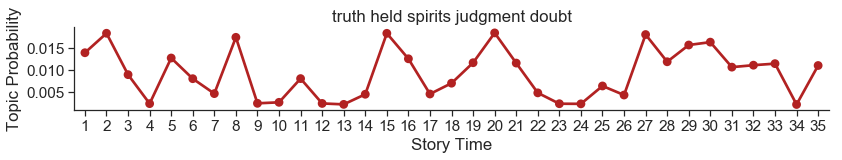

Topic ID: 34


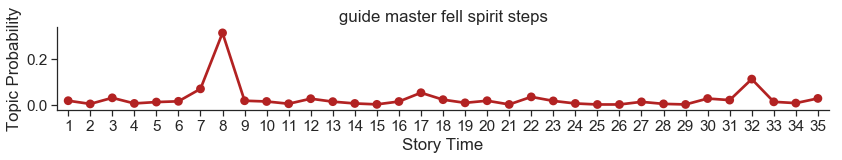

Topic ID: 35


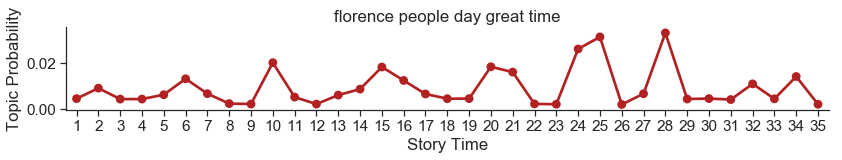

Topic ID: 36


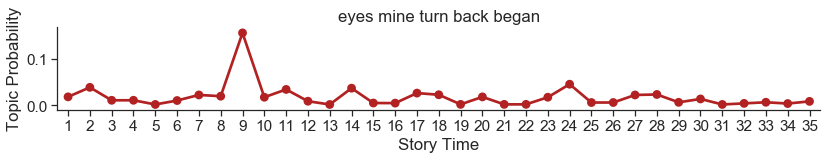

Topic ID: 37


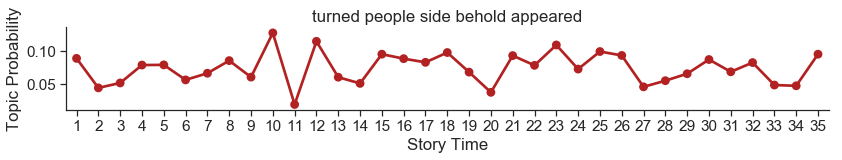

Topic ID: 38


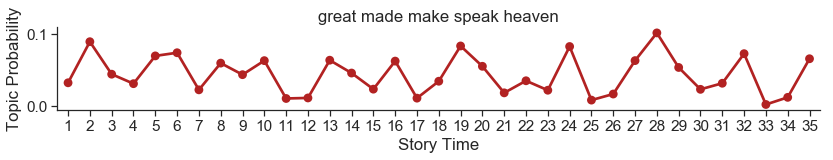

Topic ID: 39


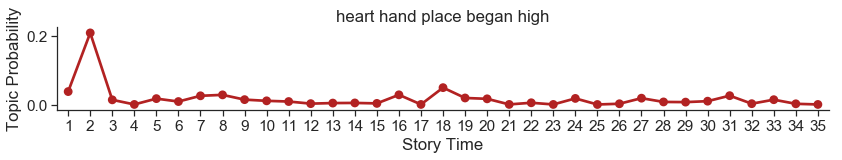

Topic ID: 40


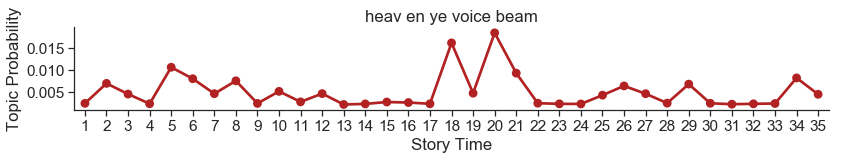

Topic ID: 41


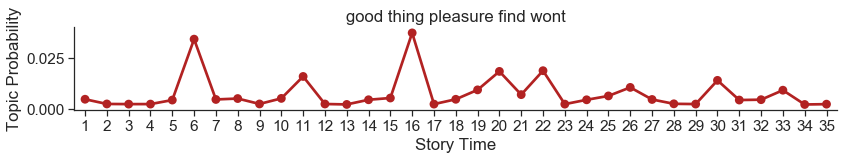

Topic ID: 42


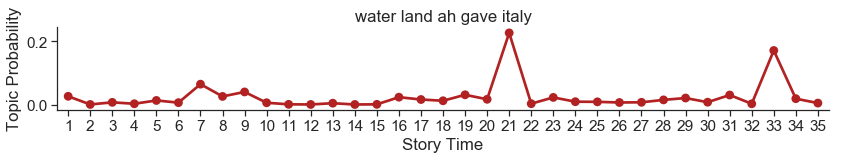

Topic ID: 43


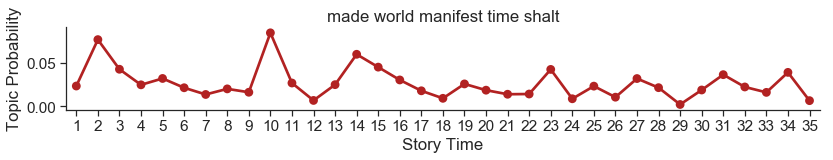

Topic ID: 44


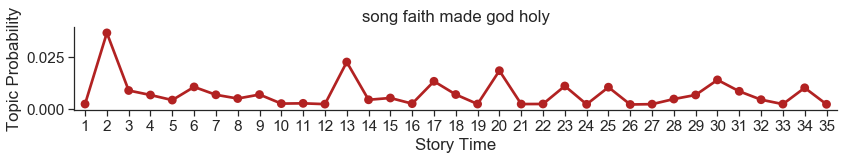

Topic ID: 45


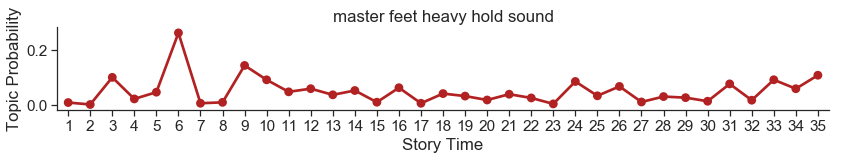

Topic ID: 46


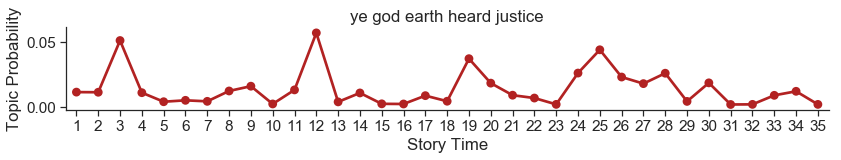

Topic ID: 47


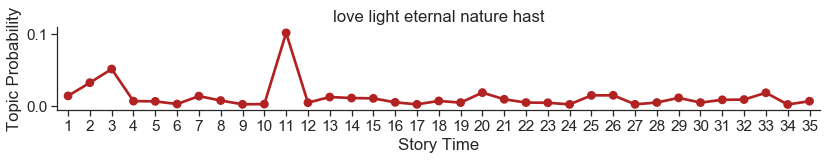

Topic ID: 48


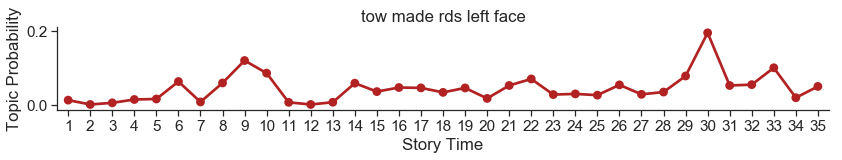

Topic ID: 49


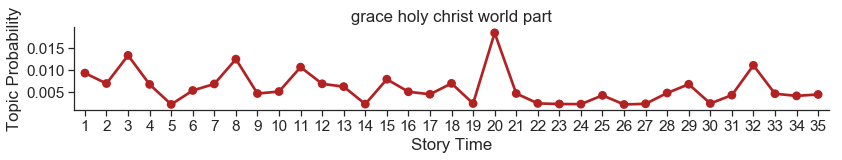

In [30]:
for i in range(0, 50):
    
    data_dicts = []
    for j, _topic_probability_tuples in enumerate(topic_distributions): 
        if text_ids[j] == 0:
            for (_topic, _probability) in _topic_probability_tuples:
                if _topic == i:
                    data_dicts.append({'Probability': _probability,
                                       'Time': times[j]})
    data_df = pd.DataFrame(data_dicts)

    print('Topic ID:', i)
    sns.set(style='ticks', font_scale=1.4)
    plt.figure(figsize=(12,2.5))
    ax = sns.pointplot(data=data_df, 
                       x='Time', 
                       y='Probability', 
                       color='firebrick', 
                       errwidth=0)

    plt.xlabel('Story Time')
    plt.ylabel('Topic Probability')
    plt.title(' '.join(topic_terms[i][:5]))
    plt.tight_layout()
    sns.despine()
#     plt.savefig(plots_directory_path + '/topics_over_time_probabilities_' + str(i) + '.pdf')
    plt.show()

In [31]:
topic_times_dict = defaultdict(list)

for i, topics in enumerate(topic_assignments):
    if text_ids[i] == 1:
        _time = times[i]
    
        for topic in topics:
            topic_times_dict[topic].append(_time)

len(topic_times_dict)

19

Topic ID: 0


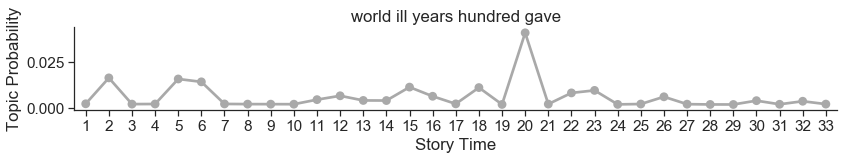

Topic ID: 1


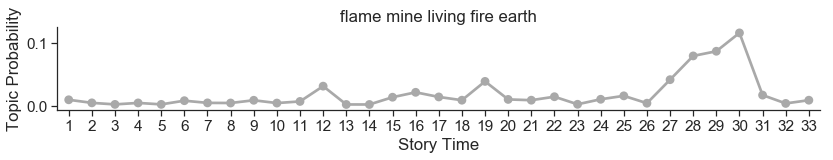

Topic ID: 2


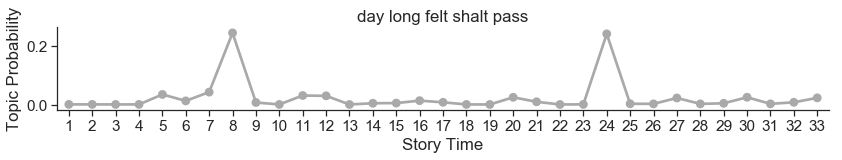

Topic ID: 3


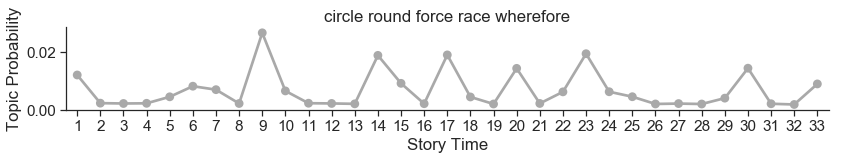

Topic ID: 4


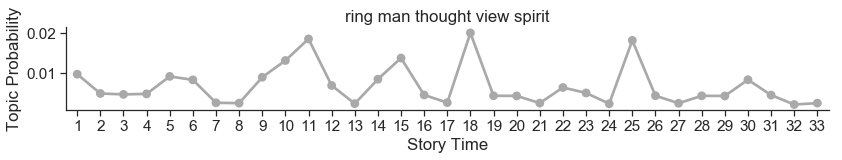

Topic ID: 5


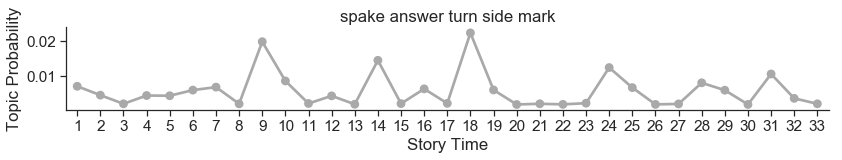

Topic ID: 6


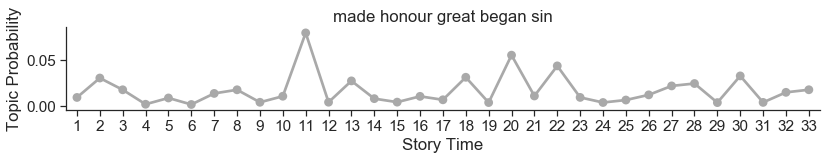

Topic ID: 7


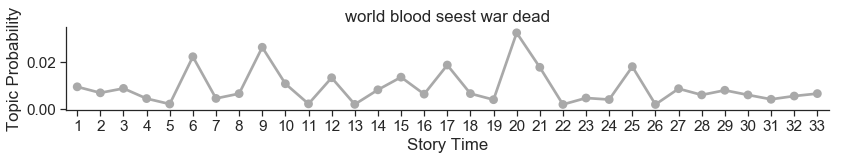

Topic ID: 8


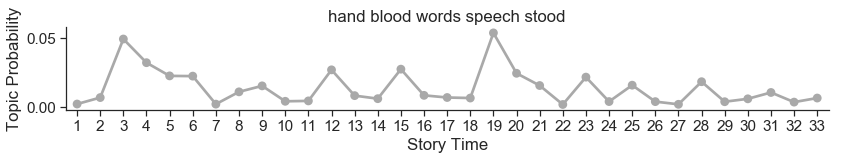

Topic ID: 9


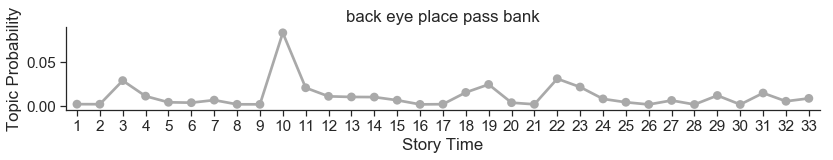

Topic ID: 10


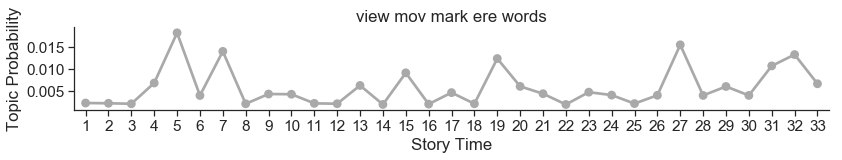

Topic ID: 11


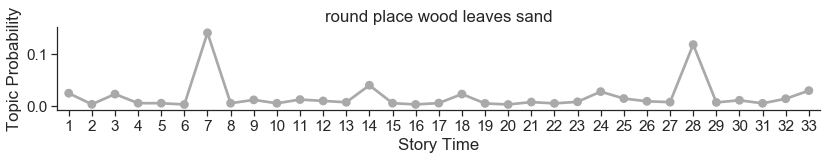

Topic ID: 12


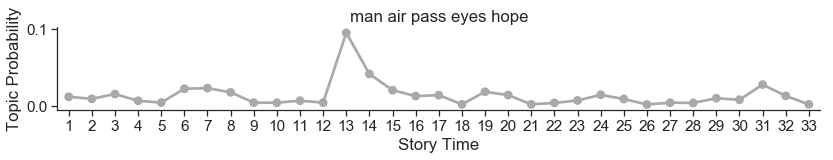

Topic ID: 13


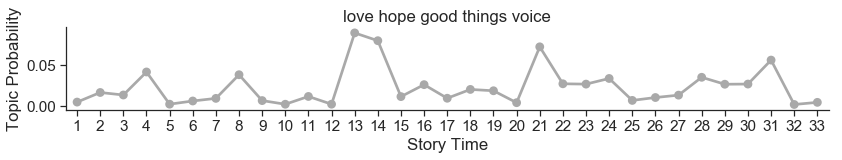

Topic ID: 14


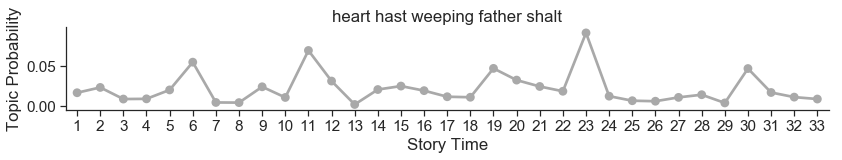

Topic ID: 15


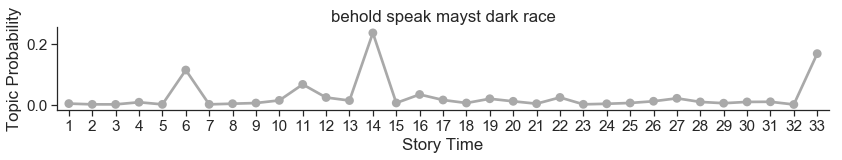

Topic ID: 16


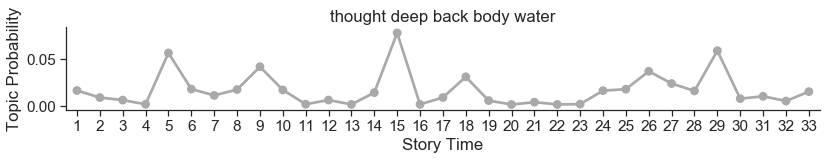

Topic ID: 17


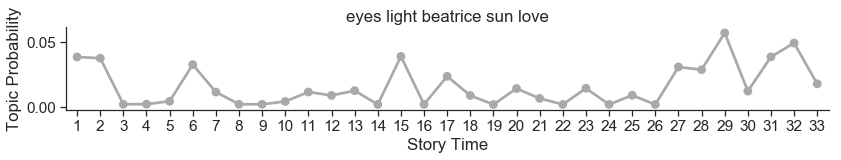

Topic ID: 18


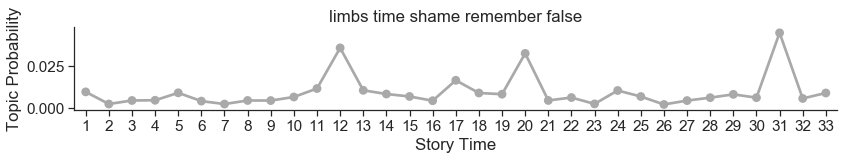

Topic ID: 19


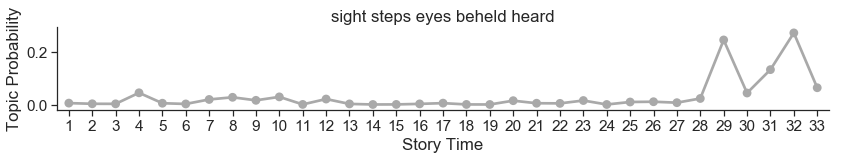

Topic ID: 20


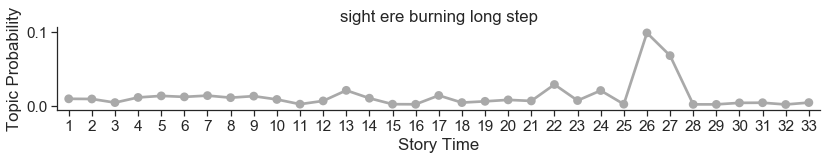

Topic ID: 21


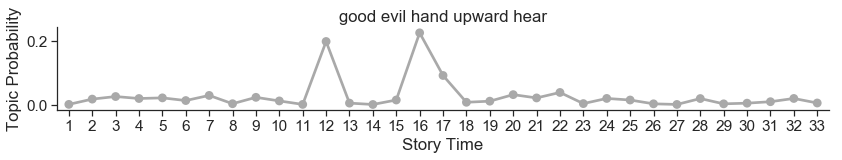

Topic ID: 22


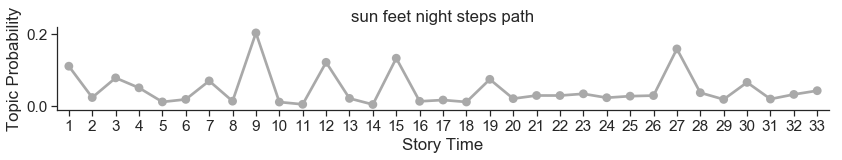

Topic ID: 23


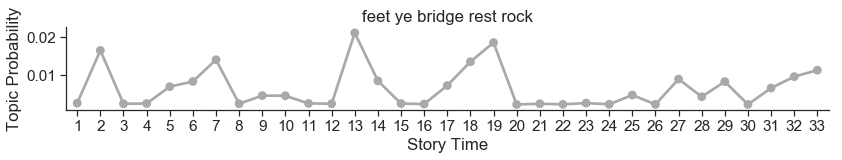

Topic ID: 24


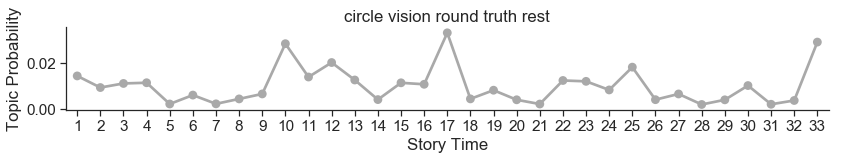

Topic ID: 25


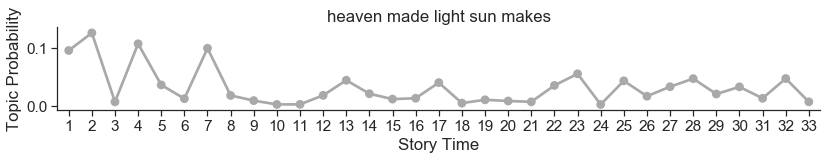

Topic ID: 26


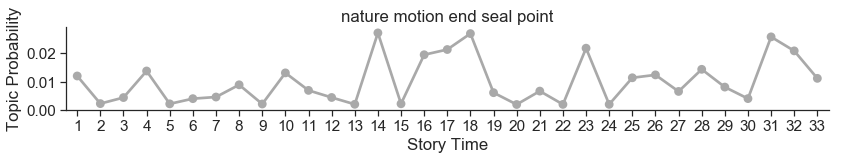

Topic ID: 27


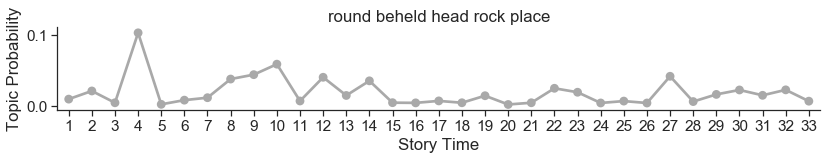

Topic ID: 28


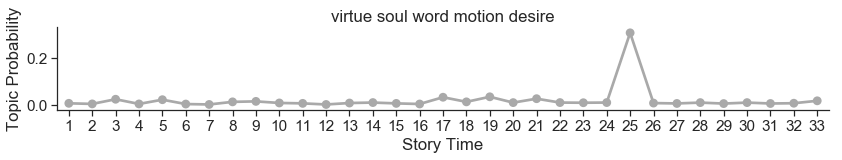

Topic ID: 29


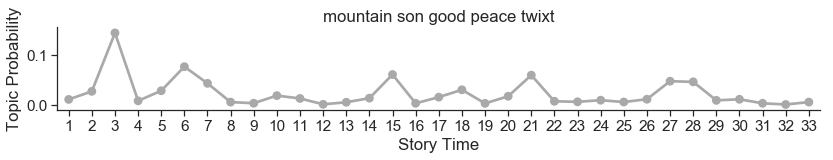

Topic ID: 30


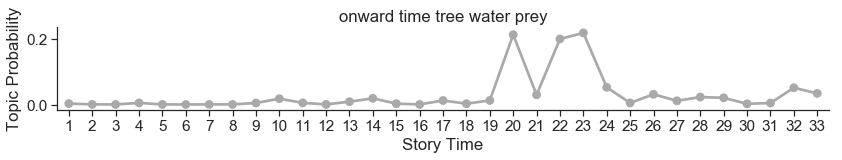

Topic ID: 31


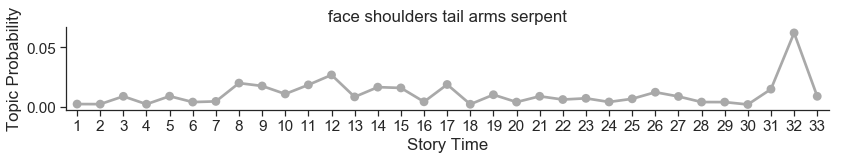

Topic ID: 32


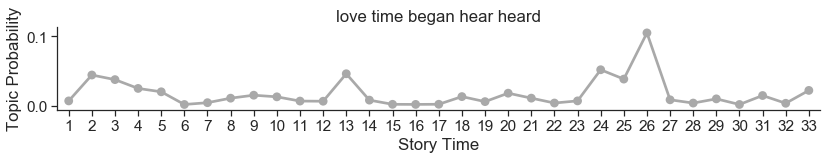

Topic ID: 33


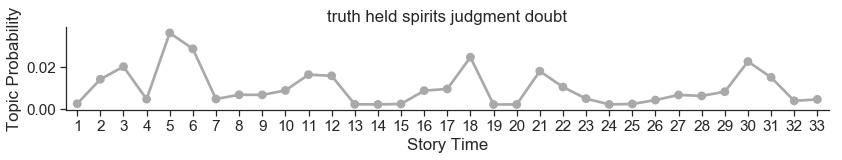

Topic ID: 34


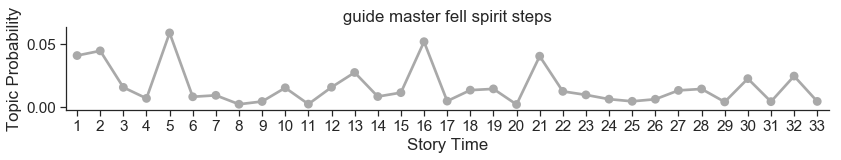

Topic ID: 35


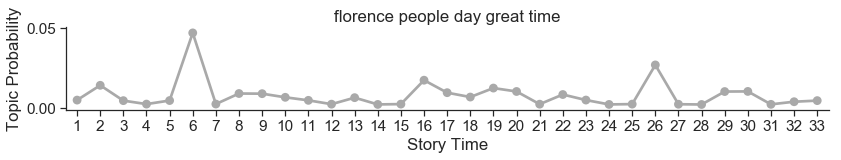

Topic ID: 36


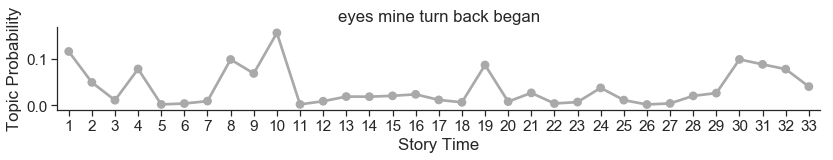

Topic ID: 37


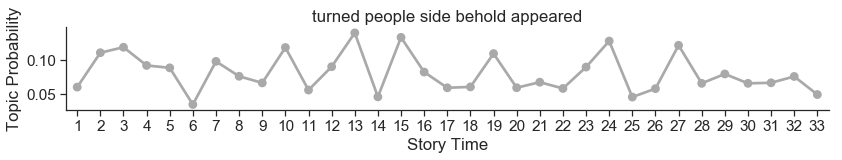

Topic ID: 38


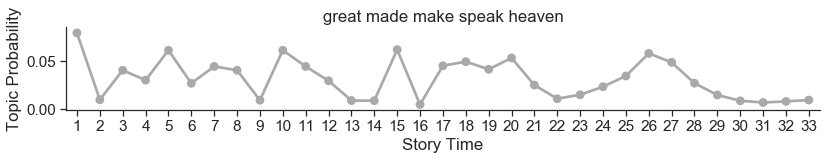

Topic ID: 39


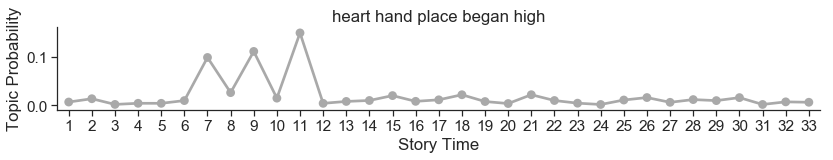

Topic ID: 40


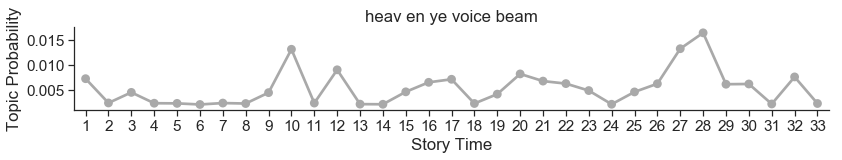

Topic ID: 41


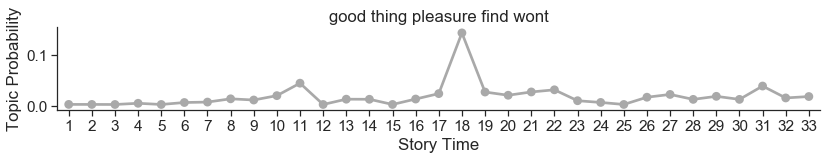

Topic ID: 42


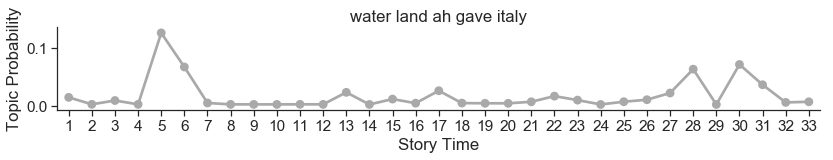

Topic ID: 43


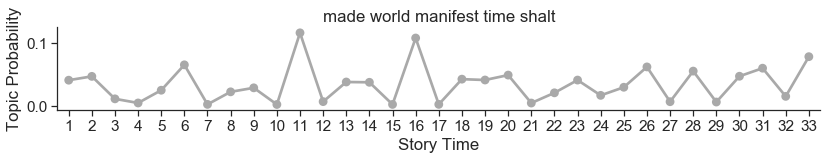

Topic ID: 44


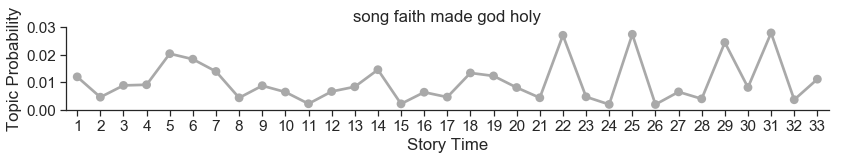

Topic ID: 45


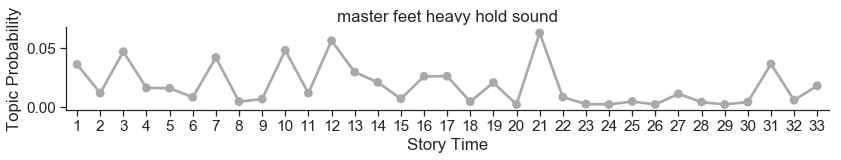

Topic ID: 46


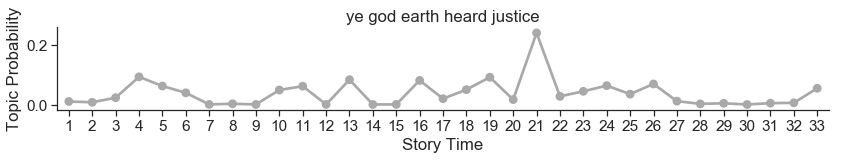

Topic ID: 47


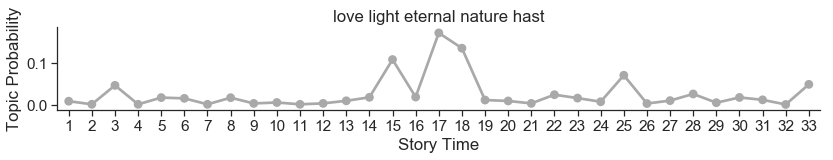

Topic ID: 48


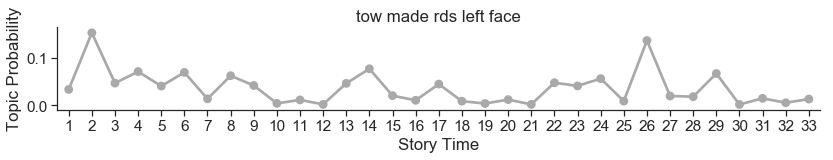

Topic ID: 49


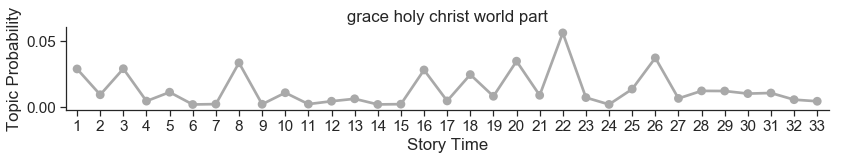

In [32]:
for i in range(0, 50):
    
    data_dicts = []
    for j, _topic_probability_tuples in enumerate(topic_distributions): 
        if text_ids[j] == 1:
            for (_topic, _probability) in _topic_probability_tuples:
                if _topic == i:
                    data_dicts.append({'Probability': _probability,
                                       'Time': times[j]})
    data_df = pd.DataFrame(data_dicts)

    print('Topic ID:', i)
    sns.set(style='ticks', font_scale=1.4)
    plt.figure(figsize=(12,2.5))
    ax = sns.pointplot(data=data_df, 
                       x='Time', 
                       y='Probability', 
                       color='darkgray', 
                       errwidth=0)

    plt.xlabel('Story Time')
    plt.ylabel('Topic Probability')
    plt.title(' '.join(topic_terms[i][:5]))
    plt.tight_layout()
    sns.despine()
#     plt.savefig(plots_directory_path + '/topics_over_time_probabilities_' + str(i) + '.pdf')
    plt.show()

In [33]:
topic_times_dict = defaultdict(list)

for i, topics in enumerate(topic_assignments):
    if text_ids[i] == 2:
        _time = times[i]
    
        for topic in topics:
            topic_times_dict[topic].append(_time)

len(topic_times_dict)

19

Topic ID: 0


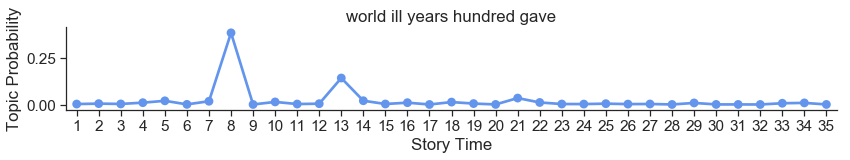

Topic ID: 1


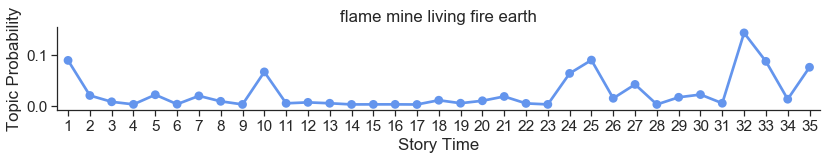

Topic ID: 2


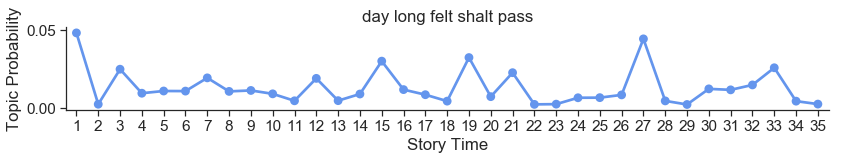

Topic ID: 3


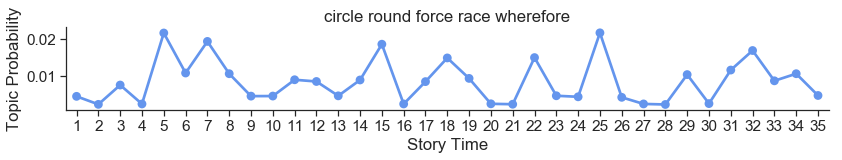

Topic ID: 4


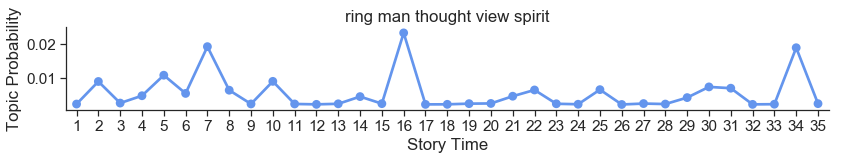

Topic ID: 5


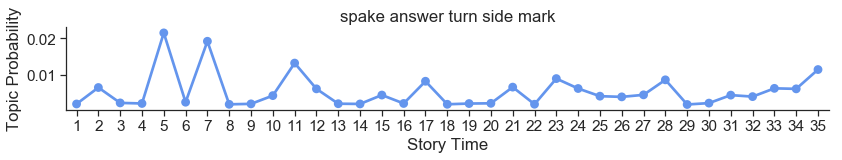

Topic ID: 6


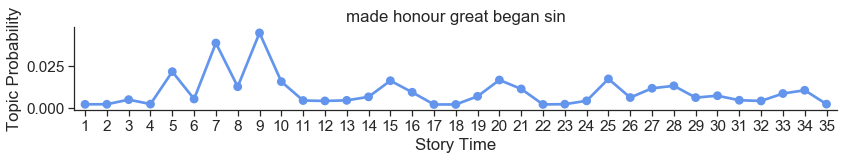

Topic ID: 7


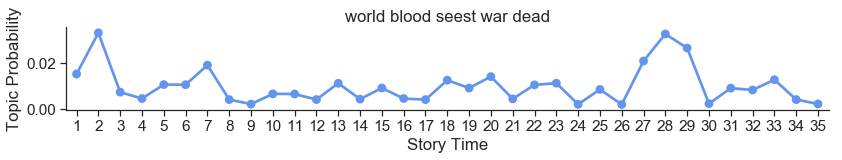

Topic ID: 8


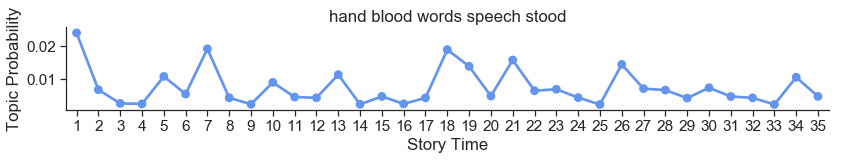

Topic ID: 9


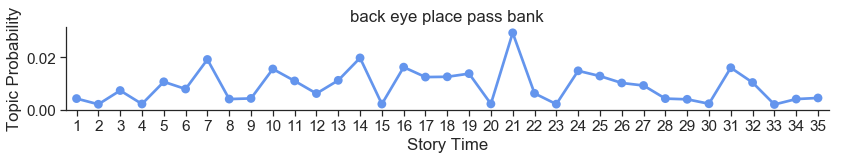

Topic ID: 10


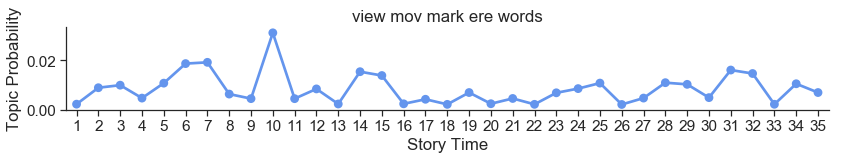

Topic ID: 11


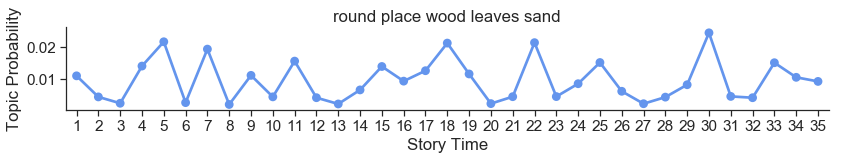

Topic ID: 12


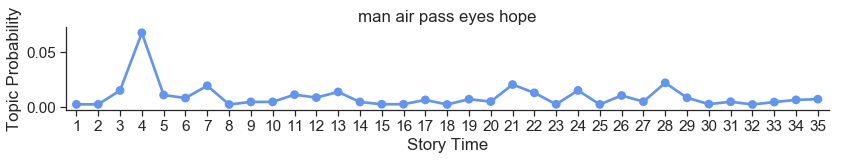

Topic ID: 13


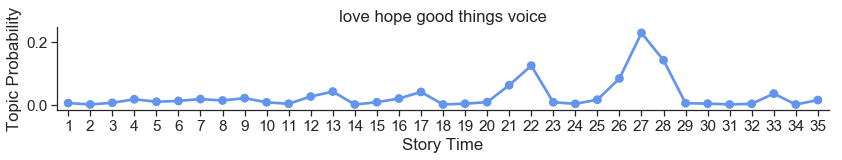

Topic ID: 14


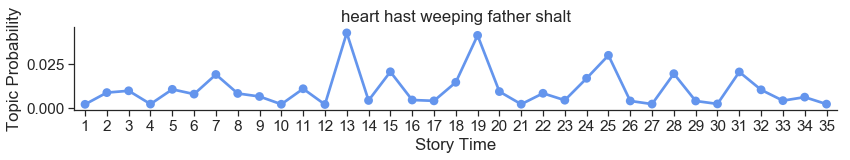

Topic ID: 15


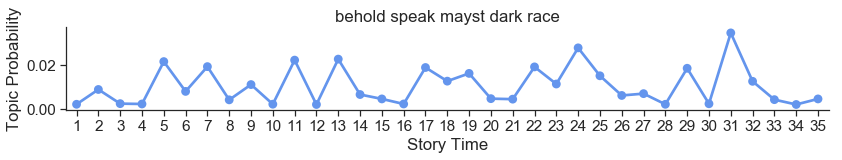

Topic ID: 16


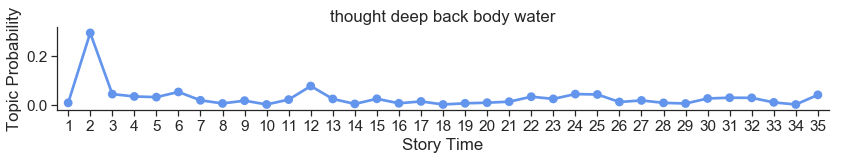

Topic ID: 17


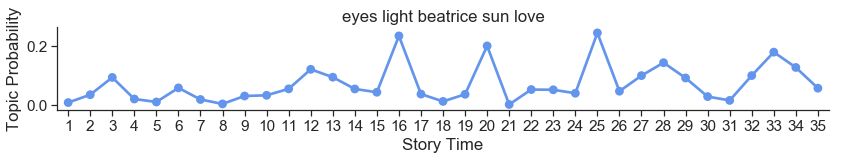

Topic ID: 18


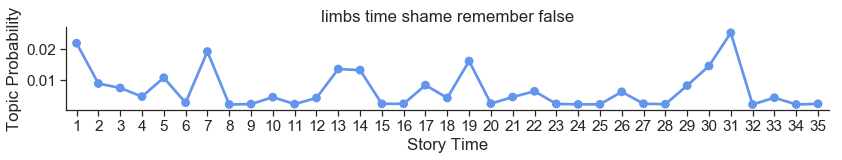

Topic ID: 19


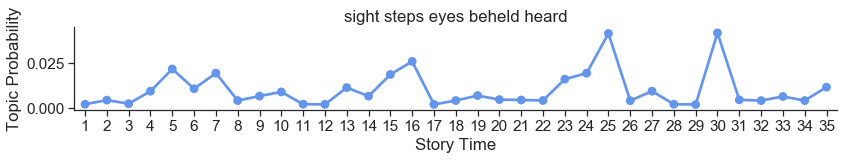

Topic ID: 20


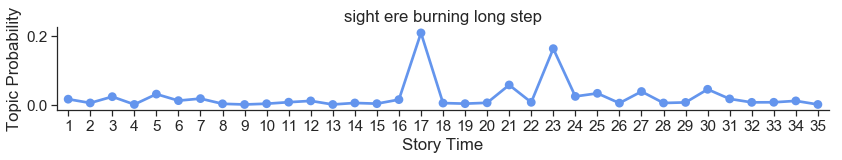

Topic ID: 21


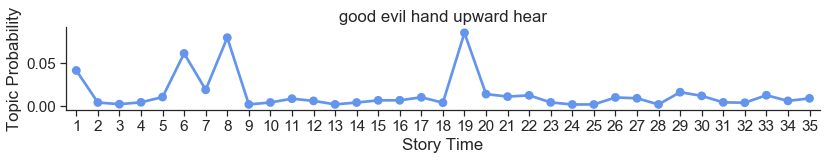

Topic ID: 22


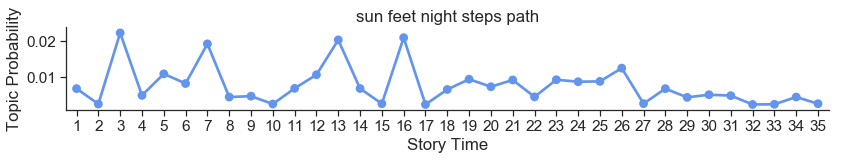

Topic ID: 23


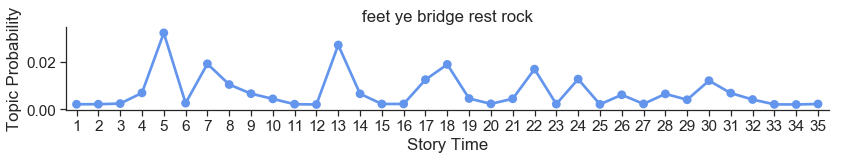

Topic ID: 24


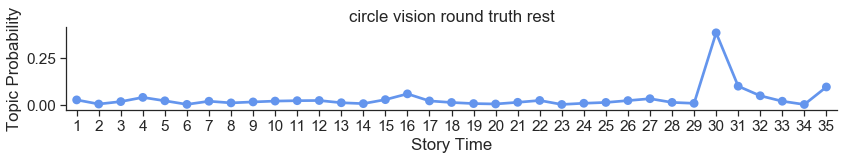

Topic ID: 25


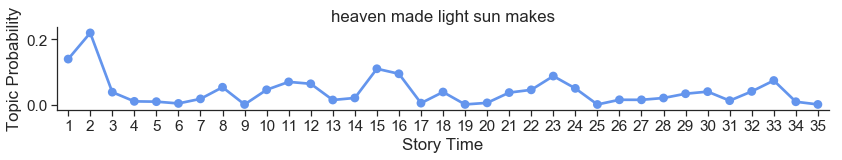

Topic ID: 26


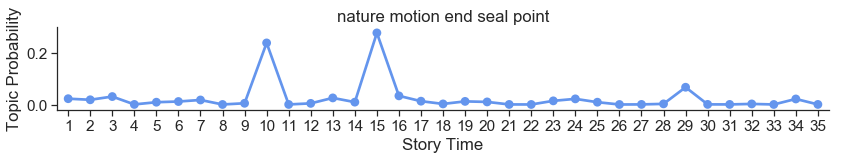

Topic ID: 27


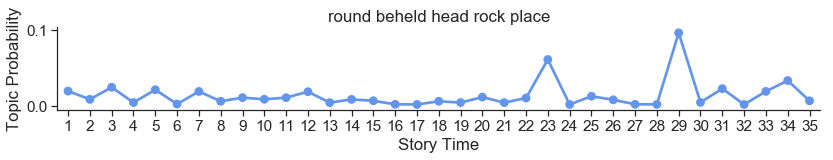

Topic ID: 28


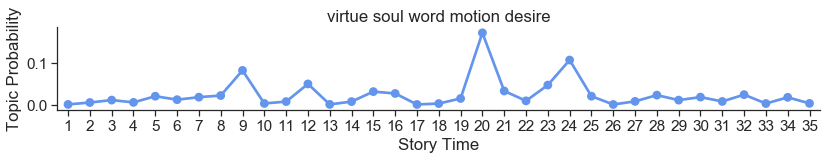

Topic ID: 29


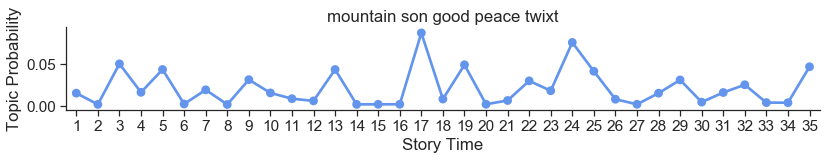

Topic ID: 30


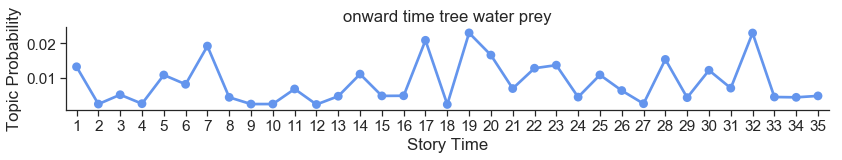

Topic ID: 31


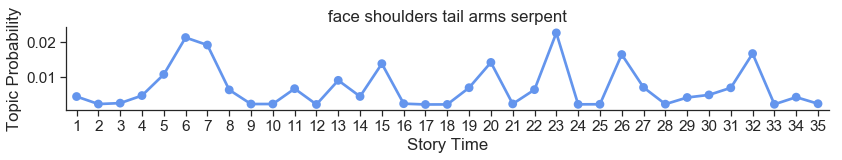

Topic ID: 32


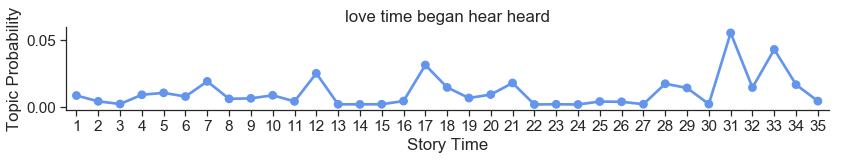

Topic ID: 33


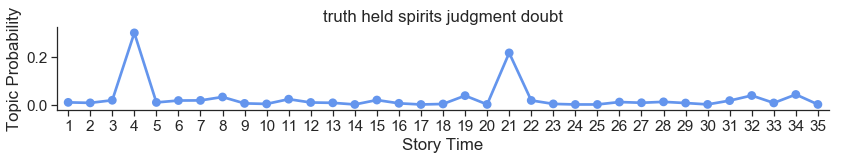

Topic ID: 34


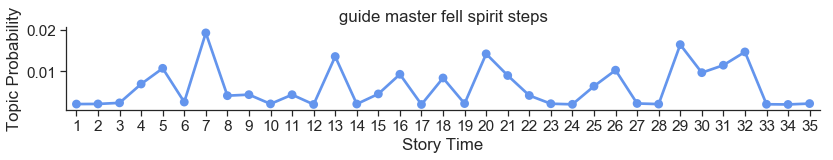

Topic ID: 35


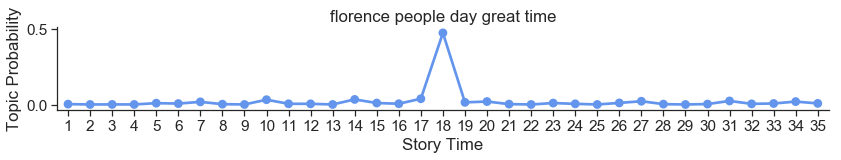

Topic ID: 36


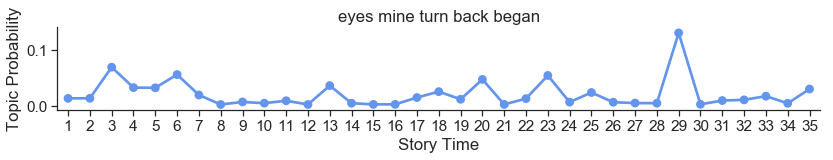

Topic ID: 37


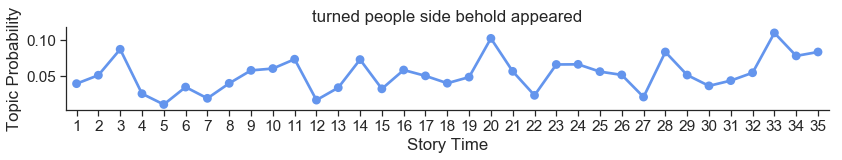

Topic ID: 38


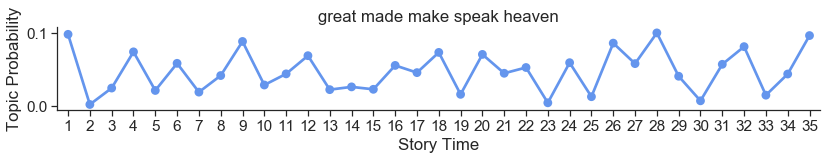

Topic ID: 39


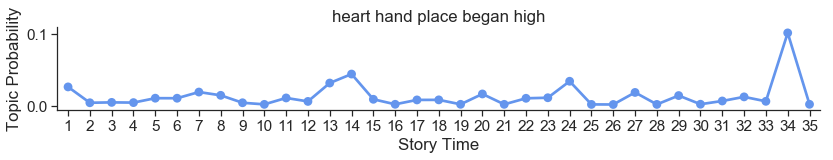

Topic ID: 40


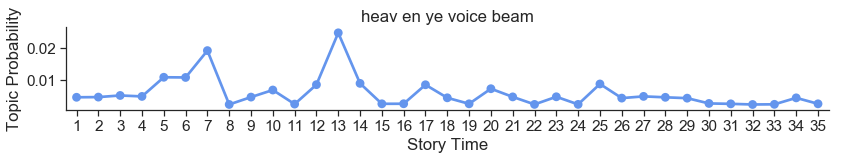

Topic ID: 41


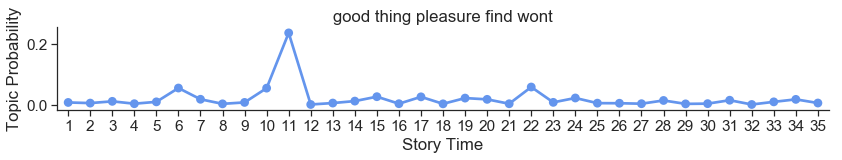

Topic ID: 42


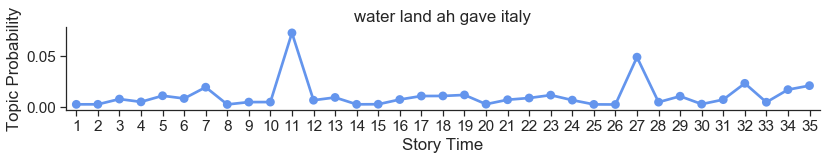

Topic ID: 43


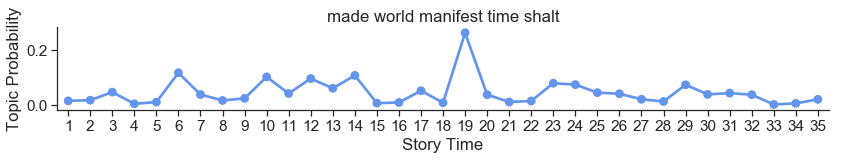

Topic ID: 44


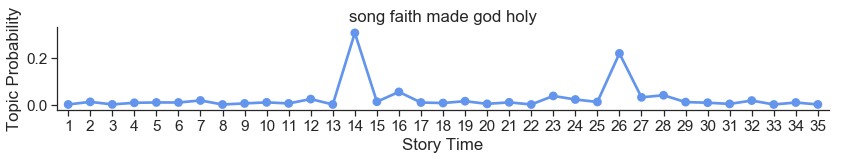

Topic ID: 45


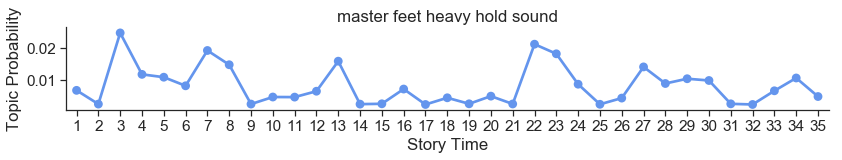

Topic ID: 46


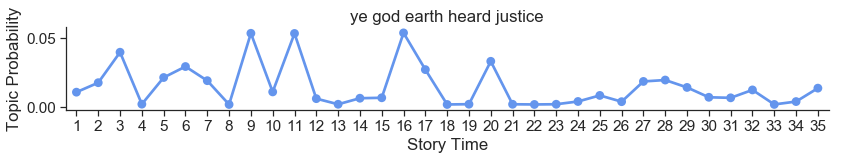

Topic ID: 47


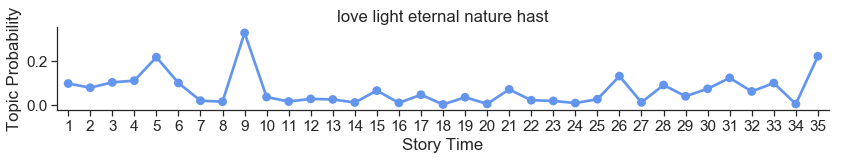

Topic ID: 48


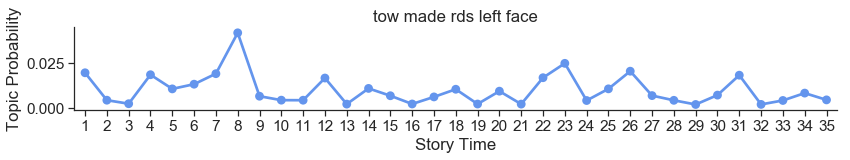

Topic ID: 49


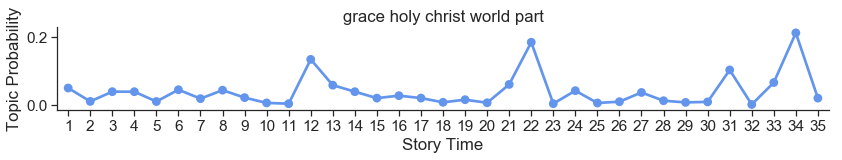

In [34]:
for i in range(0, 50):
    
    data_dicts = []
    for j, _topic_probability_tuples in enumerate(topic_distributions): 
        if text_ids[j] == 2:
            for (_topic, _probability) in _topic_probability_tuples:
                if _topic == i:
                    data_dicts.append({'Probability': _probability,
                                       'Time': times[j]})
    data_df = pd.DataFrame(data_dicts)

    print('Topic ID:', i)
    sns.set(style='ticks', font_scale=1.4)
    plt.figure(figsize=(12,2.5))
    ax = sns.pointplot(data=data_df, 
                       x='Time', 
                       y='Probability', 
                       color='cornflowerblue', 
                       errwidth=0)

    plt.xlabel('Story Time')
    plt.ylabel('Topic Probability')
    plt.title(' '.join(topic_terms[i][:5]))
    plt.tight_layout()
    sns.despine()
#     plt.savefig(plots_directory_path + '/topics_over_time_probabilities_' + str(i) + '.pdf')
    plt.show()